In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Data uploading 

In [3]:
# data file type csv
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
# check the data set
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


total 5 culomns

In [4]:
customer_data.shape

(200, 5)

In [7]:
# getting some info about the data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# checking for missing values in the dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### extract two columns annual income and spending score and working on them

In [11]:
X = customer_data.iloc[:, [3,4]].values # colone indicate columns

we are going to make clustering on the above two values
choosing the number of clusters --> WCSS --> within clusters sum of squre

$ WCSS $

In X array x-axis is represented by annual income and y-axis by spending score

$1$ when we try to find WSCC value we are looking for distance between each datapoint and Centroid of those clusters

we ploting elbowmethod

In [17]:
# wcss using for loop

wcss = []

for i in range(1, 11):  # no. of cluster will be 10
    Kmeans = KMeans(n_clusters=i, init = "k-means++", random_state=42)
    Kmeans.fit(X)
    
    wcss.append(Kmeans.inertia_)  # .intertia will give us wcss values

<function matplotlib.pyplot.show(close=None, block=None)>

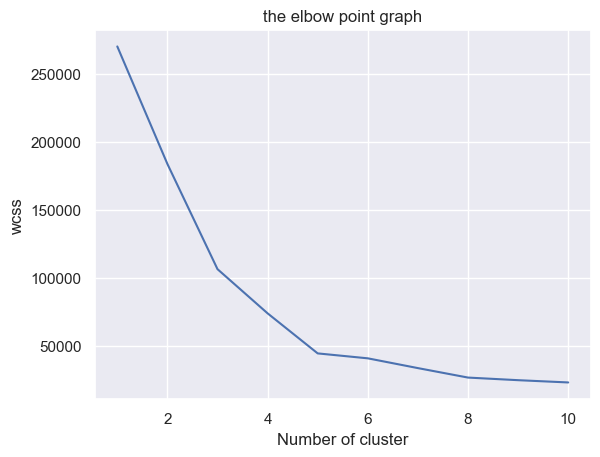

In [20]:
# plot elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title("the elbow point graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show

 here we can see there are two elbow point at number of clusters 3 and 5
 the optimum number of cluster is 5

* ###  training  the  k-means  clustering  model 

In [23]:
Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
y = Kmeans.fit_predict(X)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


ploting clusters with respect to annual income and spending score

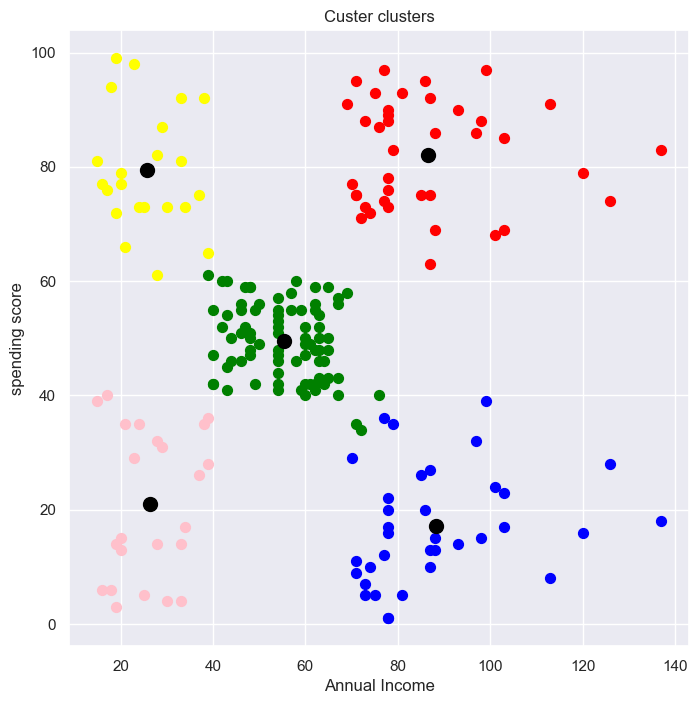

In [28]:
#ploting clusters and there centroids
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='red', label='cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='blue', label='cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='pink', label='cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='yellow', label='cluster 5')

# plot the centroids
plt.scatter(Kmeans.cluster_centers_[:, 0],Kmeans.cluster_centers_[:, 1], s =100, c = 'black', label='Centroid' )

plt.title('Custer clusters')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.show()

* ### Increasing number of features from 2 to 3 

In [6]:
P = customer_data.iloc[:, [2, 3,4]].values

In [7]:
print(P)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [8]:
# wcss using for loop

wcss_01 = []

for i in range(1, 15):  # no. of cluster will be 10
    Kmeans1 = KMeans(n_clusters=i, init = "k-means++", random_state=40)
    Kmeans1.fit(P)
    
    wcss_01.append(Kmeans1.inertia_)  # .intertia will give us wcss values

<function matplotlib.pyplot.show(close=None, block=None)>

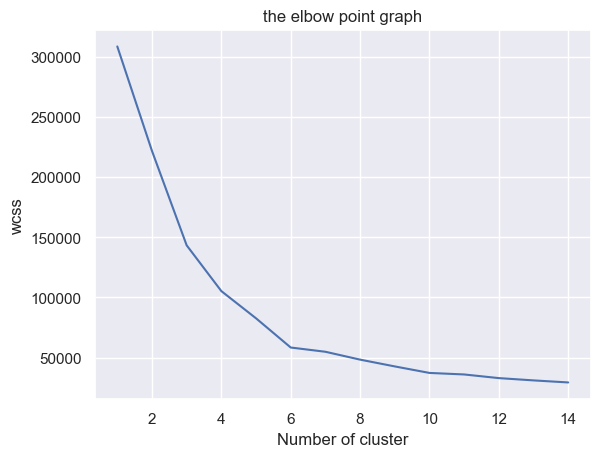

In [9]:
# plot elbow graph

sns.set()
plt.plot(range(1, 15), wcss_01)
plt.title("the elbow point graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show

In [20]:
Kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=0)

o = Kmeans1.fit_predict(P)
print(o)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


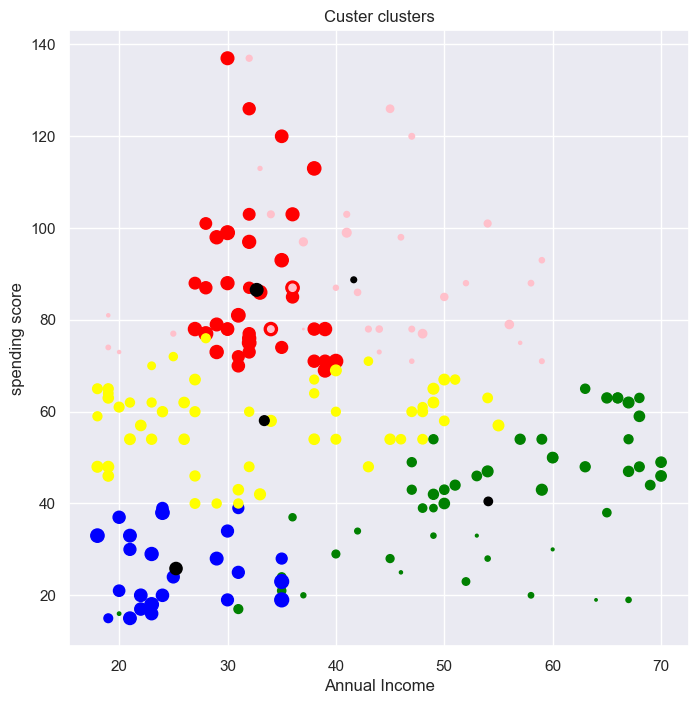

In [21]:
fig = plt.figure(figsize=(8,8))
plt.scatter(P[o==0,0], P[o==0,1],P[o==0,2], c='green', label='cluster 1')
plt.scatter(P[o==1,0], P[o==1,1],P[o==1,2], c='red', label='cluster 2')
plt.scatter(P[o==2,0], P[o==2,1],P[o==2,2], c='blue', label='cluster 3')
plt.scatter(P[o==3,0], P[o==3,1],P[o==3,2], c='pink', label='cluster 4')
plt.scatter(P[o==4,0], P[o==4,1],P[o==4,2], c='yellow', label='cluster 5')
#plt.scatter(P[o==5,0], P[o==5,1],P[o==5,2], c='cyan', label='cluster 6')
#plt.scatter(P[o==6,0], P[o==6,1],P[o==6,2], c='orange', label='cluster 7')
# plt.scatter(P[o==7,0], P[o==7,1],P[o==7,2], c='gray', label='cluster 8')
# plt.scatter(P[o==8,0], P[o==8,1],P[o==8,2], c='purple', label='cluster 9')
# plt.scatter(P[o==9,0], P[o==9,1],P[o==9,2], c='yellow', label='cluster 10')

# plot the centroids
plt.scatter(Kmeans1.cluster_centers_[:, 0],Kmeans1.cluster_centers_[:, 1],Kmeans1.cluster_centers_[:, 2], c = 'black', label='Centroid' )

plt.title('Custer clusters')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.show()